<a href="https://colab.research.google.com/github/orzuk/ElectionsDataAnalysis/blob/main/ReadElectionData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2020 elections results

In [2]:
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames



First, we need to mount our local drive to the colab network

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading elections 2020 elections data:


In [12]:
from google.colab import files
uploaded = files.upload()

Saving votes per city 2020.csv to votes per city 2020 (2).csv


In [14]:
from google.colab import files
src = list(files.upload().values())[0]


Saving election_functions.py to election_functions (1).py


In [15]:
import io
df_2020_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2020.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
# Dataset is now stored in a Pandas Dataframe

In [41]:
from election_functions import *

df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:]] # removing "metadata" columns
print("{} votes in March 2020".format(df_2020_raw['כשרים']['מעטפות חיצוניות']) + ' מעטפות חיצוניות ')



327702 votes in March 2020 מעטפות חיצוניות 


In [31]:
df_2020.head()


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
שם ישוב,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
אבו גווייעד שבט,13,0,554,0,0,0,0,0,1,0,0,0,0,0,1,1,4,0,1,0,0,0,8,2,0,0,0,0,2,2,NaN
אבו גוש,75,4,2157,0,0,0,5,0,0,5,1,0,1,0,0,5,280,0,0,0,3,2,123,0,2,0,0,1,4,14,NaN
אבו סנאן,92,6,4458,0,1,0,16,1,2,13,2,0,1,1,2,230,190,3,2,1,3,3,752,0,2,2,1,2,4,247,NaN
אבו עבדון שבט,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
אבו קורינאת שבט,9,0,1263,0,0,0,1,0,0,3,0,0,1,0,0,0,8,0,1,2,1,0,33,0,2,1,0,2,1,0,NaN


In [30]:
df_2020.describe()


,אמת,ג,ודעם,ז,זך,זץ,טב,י,יז,ינ,יף,יק,יר,כ,כן,ל,מחל,נ,נז,ני,נץ,נק,פה,ףז,ץ,ק,קי,קך,קץ,שס,Unnamed: 37
count,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.0,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,1214.000000,0.0
mean,220.329489,226.060132,479.000824,3.114498,0.172982,0.0,198.261120,0.253707,0.281713,0.557661,0.182867,0.320428,0.223229,0.425041,0.668863,216.939868,1114.043657,2.284185,0.549423,0.288303,15.981878,0.512356,1005.256178,1.213344,0.504119,0.807249,0.364086,0.557661,1.132619,290.653213,NaN
std,1493.634165,2577.916666,2217.089009,23.027370,0.976928,0.0,1157.402854,1.675648,1.991667,2.430817,0.922113,1.745647,1.215625,2.680988,3.342855,1264.164111,5912.059471,12.660412,3.025113,1.618905,86.375346,2.181258,5936.253846,13.314874,2.672797,4.035181,1.688200,2.445694,5.188742,1945.288573,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,9.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
50%,38.500000,1.500000,2.000000,0.000000,0.000000,0.0,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,73.000000,0.000000,0.000000,0.000000,1.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN
75%,98.750000,6.000000,7.000000,1.000000,0.000000,0.0,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,190.000000,1.000000,0.000000,0.000000,4.000000,0.000000,290.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,NaN
max,38808.000000,63782.000000,33145.000000,623.000000,18.000000,0.0,27357.000000,29.000000,57.000000,36.000000,13.000000,35.000000,25.000000,59.000000,58.000000,19414.000000,107049.000000,266.000000,66.000000,37.000000,1784.000000,46.000000,128637.000000,441.000000,55.000000,79.000000,27.000000,47.000000,87.000000,44649.000000,NaN


In [33]:
df_2020.iloc[5]

אמת              9.0
ג                0.0
ודעם           264.0
ז                0.0
זך               0.0
זץ               0.0
טב               1.0
י                0.0
יז               0.0
ינ               0.0
יף               0.0
יק               0.0
יר               0.0
כ                0.0
כן               0.0
ל                0.0
מחל              3.0
נ                0.0
נז               0.0
ני               0.0
נץ               0.0
נק               0.0
פה              52.0
ףז               0.0
ץ                2.0
ק                0.0
קי               0.0
קך               0.0
קץ               0.0
שס               0.0
Unnamed: 37      NaN
Name: אבו קרינאת יישוב, dtype: float64

In [34]:
df_2020.loc['הרצליה']

אמת             4796.0
ג                675.0
ודעם             235.0
ז                 58.0
זך                 3.0
זץ                 0.0
טב              1548.0
י                  1.0
יז                 1.0
ינ                 1.0
יף                 3.0
יק                 2.0
יר                 6.0
כ                  7.0
כן                 6.0
ל               2301.0
מחל            14894.0
נ                 43.0
נז                 9.0
ני                 2.0
נץ               116.0
נק                 2.0
פה             28206.0
ףז                12.0
ץ                  4.0
ק                  5.0
קי                 3.0
קך                 3.0
קץ                13.0
שס              1878.0
Unnamed: 37        NaN
Name: הרצליה, dtype: float64

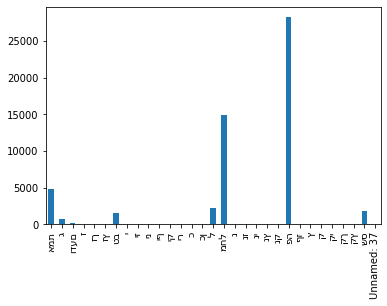

In [38]:
df_2020.loc['הרצליה'].plot.bar()

Next, we create a function for showing a bar plot of the voting **percentage** in a given city, while showing only the parties above a % threshold 

In [39]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

# Bar plot for a party, only showing values above a certain threshold
def party_bar(df, thresh, city):
    width = 0.3  # set column width 
    votes = parties_votes(df, thresh)  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    city_votes = df.loc[city,names] / df.loc[city,names].sum()
    all_bar = ax.bar(np.arange(n), list(votes), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(city_votes), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', city[::-1]))
    plt.show()

    return fig, ax



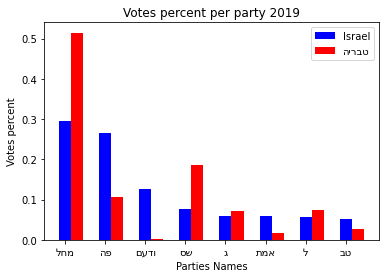

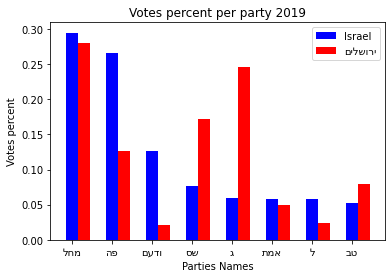

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f56d7e81978>)

In [42]:
party_bar(df_2020, 0.0325, 'טבריה')
party_bar(df_2020, 0.0325, 'ירושלים')